In [2]:
# import necessary libraries
library(caTools)
library(readxl) # to read excel
library(plyr) 
library(caTools)

library(e1071) 
library(caret) 
library(randomForest)

### Data Understanding


In [3]:
# load data 
attribset = read_excel('Attribute DataSet.xlsx')
dresssale = read_excel('Dress Sales.xlsx')

#remove Dress_ID column
attribset_ = attribset[2:14] 
dresssale_ = dresssale[2:24]




### Data Preparation

#### Attributes dataset

In [4]:
# check the unique values for each columns
#lapply(attribset[2:14], unique)

# values checking
# style 
attribset_$Style[attribset_$Style == 'sexy'] = 'Sexy'

# Price
attribset_$Price[attribset_$Price == 'low'] = 'Low'
attribset_$Price[attribset_$Price == 'high'] = 'High'

# Size
attribset_$Size[attribset_$Size == 's'] = 'S' 
attribset_$Size[attribset_$Size == 'small'] = 'S'

# Season 
attribset_$Season[attribset_$Season == 'spring'] = 'Spring'
attribset_$Season[attribset_$Season == 'summer'] = 'Summer'
attribset_$Season[attribset_$Season == 'Automn'] = 'Autumn'
attribset_$Season[attribset_$Season == 'winter'] = 'Winter'

# NeckLine 
attribset_$NeckLine[attribset_$NeckLine == 'sweetheart'] = 'Sweetheart'

# SleeveLength
attribset_$SleeveLength[attribset_$SleeveLength == 'sleevless'] = 'sleeveless' 
attribset_$SleeveLength[attribset_$SleeveLength == 'sleeevless'] = 'sleeveless' 
attribset_$SleeveLength[attribset_$SleeveLength == 'sleveless'] = 'sleeveless' 
attribset_$SleeveLength[attribset_$SleeveLength == 'threequater'] = 'threequarter' 
attribset_$SleeveLength[attribset_$SleeveLength == 'thressqatar'] = 'threequarter' 
attribset_$SleeveLength[attribset_$SleeveLength == 'urndowncollor'] = 'turndowncollar' 

# FabricType
attribset_$FabricType[attribset_$FabricType == 'shiffon'] = 'chiffon'
attribset_$FabricType[attribset_$FabricType == 'sattin'] = 'satin'
attribset_$FabricType[attribset_$FabricType == 'wollen'] = 'woolen'
attribset_$FabricType[attribset_$FabricType == 'flannael'] = 'flannel'
attribset_$FabricType[attribset_$FabricType == 'knitting'] = 'knitted'


# Decoration
attribset_$Decoration[attribset_$Decoration == 'embroidary'] = 'embroidery'
attribset_$Decoration[attribset_$Decoration == 'sequined'] = 'sequins'
attribset_$Decoration[attribset_$Decoration == 'ruched'] = 'ruche'
attribset_$Decoration[attribset_$Decoration == 'none'] = 'null'

# Pattern Type
attribset_$'Pattern Type'[attribset_$'Pattern Type' == 'none'] = 'null' 
attribset_$'Pattern Type'[attribset_$'Pattern Type' == 'leapord'] = 'leopard'


In [5]:
# factoring 

attribset_$Style = factor(attribset_$Style, 
                          levels = c('Sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'Novelty', 'Flare', 'party', 'work', 'OL', 'fashion'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11))

attribset_$Price = factor(attribset_$Price, 
                          levels = c('Low', 'High', 'Average', 'Medium', 'very-high'),
                          labels = c(0,1,2,3,4))

attribset_$Size = factor(attribset_$Size, 
                          levels = c('M', 'L', 'XL', 'free', 'S'),
                          labels = c(0,1,2,3,4))

attribset_$Season = factor(attribset_$Season, 
                          levels = c('Summer', 'Autumn', 'Spring', 'Winter'),
                          labels = c(0,1,2,3))

attribset_$NeckLine = factor(attribset_$NeckLine, 
                          levels = c('o-neck', 'v-neck', 'boat-neck', 'peterpan-collor', 'ruffled', 'turndowncollor', 'slash-neck', 'mandarin-collor', 'open', 'sqare-collor', 'Sweetheart', 'Scoop', 'halter', 'backless', 'bowneck', 'NULL'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))

attribset_$SleeveLength = factor(attribset_$SleeveLength, 
                          levels = c('sleeveless', 'Petal', 'full', 'butterfly', 'short', 'threequarter', 'halfsleeve', 'cap-sleeves', 'turndowncollor', 'capsleeves', 'half', 'turndowncollar', 'NULL'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11,12))

attribset_$waiseline = factor(attribset_$waiseline, 
                          levels = c('empire', 'natural', 'null', 'princess', 'dropped'),
                          labels = c(0,1,2,3,4))

attribset_$Material = factor(attribset_$Material, 
                          levels = c('null', 'microfiber', 'polyster', 'silk', 'chiffonfabric', 'cotton', 'nylon', 'other', 'milksilk', 'linen', 'rayon', 'lycra', 'mix', 'acrylic', 'spandex', 'lace', 'modal', 'cashmere', 'viscos', 'knitting', 'sill', 'wool', 'model', 'shiffon'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))

attribset_$FabricType = factor(attribset_$FabricType, 
                          levels = c('chiffon', 'null', 'broadcloth', 'jersey', 'other', 'batik', 'satin', 'flannel', 'worsted', 'woolen', 'poplin', 'dobby', 'knitted', 'tulle', 'organza', 'lace', 'Corduroy', 'terry'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

attribset_$Decoration = factor(attribset_$Decoration, 
                          levels = c('ruffles', 'null', 'embroidery', 'bow', 'lace', 'beading', 'sashes', 'hollowout', 'pockets', 'sequins', 'applique', 'button', 'Tiered', 'rivet', 'feathers', 'flowers', 'pearls', 'pleat', 'crystal', 'ruche', 'draped', 'tassel', 'plain', 'cascading'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))

attribset_$`Pattern Type` = factor(attribset_$`Pattern Type`, 
                          levels = c('animal', 'print', 'dot', 'solid', 'null', 'patchwork', 'striped', 'geometric', 'plaid', 'leopard', 'floral', 'character', 'splice'),
                          labels = c(0,1,2,3,4,5,6,7,8,9,10,11,12))

attribset_$Recommendation = sapply(attribset_$Recommendation, factor)

In [6]:
# count of missing values in attribset_ dataset
colSums(is.na(attribset_))

Style          Price         Rating           Size         Season 
             0              2              0              0              2 
      NeckLine   SleeveLength      waiseline       Material     FabricType 
             1              0              1              1              1 
    Decoration   Pattern Type Recommendation 
             1              1              0

In [7]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# fill missing Value with mode
attribset_$Price[is.na(attribset_$Price) ==TRUE] <- getmode(attribset_$Price)
attribset_$Season[is.na(attribset_$Season) ==TRUE] <- getmode(attribset_$Season)
attribset_$NeckLine[is.na(attribset_$NeckLine) ==TRUE] <- getmode(attribset_$NeckLine)
attribset_$waiseline[is.na(attribset_$waiseline) ==TRUE] <- getmode(attribset_$waiseline)
attribset_$Material[is.na(attribset_$Material) ==TRUE] <- getmode(attribset_$Material)
attribset_$FabricType[is.na(attribset_$FabricType) ==TRUE] <- getmode(attribset_$FabricType)
attribset_$Decoration[is.na(attribset_$Decoration) ==TRUE] <- getmode(attribset_$Decoration)
attribset_$`Pattern Type`[is.na(attribset_$`Pattern Type`) ==TRUE] <- getmode(attribset_$`Pattern Type`)

In [8]:
attribset_data <- data.frame(attribset_)
str(attribset_data)

'data.frame':	500 obs. of  13 variables:
 $ Style         : Factor w/ 12 levels "0","1","2","3",..: 1 2 3 4 5 6 2 7 8 6 ...
 $ Price         : Factor w/ 5 levels "0","1","2","3",..: 1 1 2 3 1 1 3 3 3 1 ...
 $ Rating        : num  4.6 0 0 4.6 4.5 0 0 0 0 0 ...
 $ Size          : Factor w/ 5 levels "0","1","2","3",..: 1 2 2 2 1 1 3 4 4 4 ...
 $ Season        : Factor w/ 4 levels "0","1","2","3": 1 1 2 3 1 1 1 2 3 1 ...
 $ NeckLine      : Factor w/ 16 levels "0","1","2","3",..: 1 1 1 1 1 2 1 1 2 2 ...
 $ SleeveLength  : Factor w/ 13 levels "0","1","2","3",..: 1 2 3 3 4 1 3 5 5 1 ...
 $ waiseline     : Factor w/ 5 levels "0","1","2","3",..: 1 2 2 2 2 1 3 2 1 2 ...
 $ Material      : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 1 6 3 6 7 ...
 $ FabricType    : Factor w/ 18 levels "0","1","2","3",..: 1 2 2 1 1 2 2 3 3 1 ...
 $ Decoration    : Factor w/ 24 levels "0","1","2","3",..: 1 1 2 3 4 2 2 5 6 2 ...
 $ Pattern.Type  : Factor w/ 13 levels "0","1","2","3",..: 1 1 2 2 3 2 4 5 4 5 ...

#### Dresses dataset 

In [9]:
# Update columns name in dresssale_ dataset

dresssale_ = rename(dresssale_,c('41314'='2/9/2013'))
dresssale_ = rename(dresssale_,c('41373'='4/9/2013'))
dresssale_ = rename(dresssale_,c('41434'='6/9/2013'))
dresssale_ = rename(dresssale_,c('41495'='8/9/2013'))
dresssale_ = rename(dresssale_,c('41556'='10/9/2013'))
dresssale_ = rename(dresssale_,c('41617'='12/9/2013'))
dresssale_ = rename(dresssale_,c('41315'='2/10/2013'))
dresssale_ = rename(dresssale_,c('41374'='4/10/2013'))
dresssale_ = rename(dresssale_,c('41435'='6/10/2013'))
dresssale_ = rename(dresssale_,c('40400'='8/10/2013'))
dresssale_ = rename(dresssale_,c('41557'='10/10/2013'))
dresssale_ = rename(dresssale_,c('41618'='12/10/2013'))


In [10]:
# Convert all variable types to numeric
dresssale_ <- as.data.frame(apply(dresssale_, 2, as.numeric))

# mean row 
dresssale_ = as.matrix(dresssale_)
k <- which(is.na(dresssale_), arr.ind=TRUE)
dresssale_[k] <- rowMeans(dresssale_, na.rm=TRUE)[k[,1]]
dresssale_ = as.data.frame(dresssale_)


Warning message in apply(dresssale_, 2, as.numeric):
"NAs introduced by coercion"Warning message in apply(dresssale_, 2, as.numeric):
"NAs introduced by coercion"Warning message in apply(dresssale_, 2, as.numeric):
"NAs introduced by coercion"Warning message in apply(dresssale_, 2, as.numeric):
"NAs introduced by coercion"Warning message in apply(dresssale_, 2, as.numeric):
"NAs introduced by coercion"Warning message in apply(dresssale_, 2, as.numeric):
"NAs introduced by coercion"

In [11]:
# sum all values on row on (total sales)
dresssale_$total_sales = rowSums(dresssale_)
head(dresssale_)

29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,...,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2013,10/10/2013,12/10/2013,total_sales
2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,...,3624,3706,3746,3795,3832,3897,3923,3985,4048,75979
151,275,570,750,813,1066,1164,1558,1756,1878,...,2942,3258,3354,3475,3654,3911,4024,4125,4277,52256
6,7,7,7,8,8,9,10,10,10,...,11,11,11,11,11,11,11,11,11,223
1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,...,1892,1914,1924,1929,1941,1952,1955,1959,1963,39691
996,1175,1304,1396,1432,1559,1570,1638,1655,1681,...,2156,2252,2312,2387,2459,2544,2614,2693,2736,44077
4,5,11,13,13,13,16,18,19,20,...,25,26,26,26,26,27,27,27,27,457


#### Marged data

In [12]:
merged_data <- data.frame(attribset_ ,dresssale_)
head(merged_data)

Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,...,X26.9.2013,X28.9.2013,X30.9.2013,X2.10.2013,X4.10.2013,X6.10.2013,X8.10.2013,X10.10.2013,X12.10.2013,total_sales
0,0,4.6,0,0,0,0,0,0,0,...,3624,3706,3746,3795,3832,3897,3923,3985,4048,75979
1,0,0.0,1,0,0,1,1,1,1,...,2942,3258,3354,3475,3654,3911,4024,4125,4277,52256
2,1,0.0,1,1,0,2,1,2,1,...,11,11,11,11,11,11,11,11,11,223
3,2,4.6,1,2,0,2,1,3,0,...,1892,1914,1924,1929,1941,1952,1955,1959,1963,39691
4,0,4.5,0,0,0,3,1,4,0,...,2156,2252,2312,2387,2459,2544,2614,2693,2736,44077
5,0,0.0,0,0,1,0,0,0,1,...,25,26,26,26,26,27,27,27,27,457


In [13]:
str(merged_data)

'data.frame':	500 obs. of  37 variables:
 $ Style         : Factor w/ 12 levels "0","1","2","3",..: 1 2 3 4 5 6 2 7 8 6 ...
 $ Price         : Factor w/ 5 levels "0","1","2","3",..: 1 1 2 3 1 1 3 3 3 1 ...
 $ Rating        : num  4.6 0 0 4.6 4.5 0 0 0 0 0 ...
 $ Size          : Factor w/ 5 levels "0","1","2","3",..: 1 2 2 2 1 1 3 4 4 4 ...
 $ Season        : Factor w/ 4 levels "0","1","2","3": 1 1 2 3 1 1 1 2 3 1 ...
 $ NeckLine      : Factor w/ 16 levels "0","1","2","3",..: 1 1 1 1 1 2 1 1 2 2 ...
 $ SleeveLength  : Factor w/ 13 levels "0","1","2","3",..: 1 2 3 3 4 1 3 5 5 1 ...
 $ waiseline     : Factor w/ 5 levels "0","1","2","3",..: 1 2 2 2 2 1 3 2 1 2 ...
 $ Material      : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 1 6 3 6 7 ...
 $ FabricType    : Factor w/ 18 levels "0","1","2","3",..: 1 2 2 1 1 2 2 3 3 1 ...
 $ Decoration    : Factor w/ 24 levels "0","1","2","3",..: 1 1 2 3 4 2 2 5 6 2 ...
 $ Pattern.Type  : Factor w/ 13 levels "0","1","2","3",..: 1 1 2 2 3 2 4 5 4 5 ...

In [14]:
# spliting dataset 
set.seed(100)

spl = sample.split(merged_data$Recommendation, SplitRatio = 0.7)
train = subset(merged_data, spl==TRUE)
test = subset(merged_data, spl==FALSE)

print(dim(train)); print(dim(test))

[1] 350  37
[1] 150  37


## Classification - Predict recommendation

#### First model (Naive Bayes)

In [15]:
# naive bayes model
naive_model = naiveBayes(Recommendation ~.,data = train) # build model
confusionMatrix(train$Recommendation,predict(naive_model,train),positive = '1') # create confusion Matrix
print('---------------')
naive_predict = predict(naive_model,test) # predict test set
table(naive_predict,test$Recommendation) # create table 

Confusion Matrix and Statistics

          Reference
Prediction   1   0
         1 106  41
         0  67 136
                                          
               Accuracy : 0.6914          
                 95% CI : (0.6401, 0.7394)
    No Information Rate : 0.5057          
    P-Value [Acc > NIR] : 1.409e-12       
                                          
                  Kappa : 0.3817          
                                          
 Mcnemar's Test P-Value : 0.01614         
                                          
            Sensitivity : 0.6127          
            Specificity : 0.7684          
         Pos Pred Value : 0.7211          
         Neg Pred Value : 0.6700          
             Prevalence : 0.4943          
         Detection Rate : 0.3029          
   Detection Prevalence : 0.4200          
      Balanced Accuracy : 0.6905          
                                          
       'Positive' Class : 1               
                              

[1] "---------------"


             
naive_predict  1  0
            1 33 37
            0 30 50

#### Second model (Support Vector Machine) 

In [16]:
# Support vector machine
svm_model = svm(Recommendation ~.,train) # build model
confusionMatrix(train$Recommendation,predict(svm_model),positive = '1')# create confusion Matrix
print('---------------')
svm_predict = predict(svm_model,test) # predict test set
table(svm_predict,test$Recommendation) # create table

Confusion Matrix and Statistics

          Reference
Prediction   1   0
         1   6 141
         0   0 203
                                          
               Accuracy : 0.5971          
                 95% CI : (0.5437, 0.6489)
    No Information Rate : 0.9829          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.047           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.00000         
            Specificity : 0.59012         
         Pos Pred Value : 0.04082         
         Neg Pred Value : 1.00000         
             Prevalence : 0.01714         
         Detection Rate : 0.01714         
   Detection Prevalence : 0.42000         
      Balanced Accuracy : 0.79506         
                                          
       'Positive' Class : 1               
                              

[1] "---------------"


           
svm_predict  1  0
          1  0  2
          0 63 85

#### Third model (Random Forest)

In [17]:
# Random Forest
randomForest_model = randomForest(x = train, y = train$Recommendation,ntree =800)# build model
confusionMatrix(train$Recommendation,predict(randomForest_model),positive = '1') # create confusion Matrix
print('---------------')
randomForest_predict = predict(randomForest_model,test) # predict test set
table(randomForest_predict,test$Recommendation )# create table

Confusion Matrix and Statistics

          Reference
Prediction   1   0
         1 147   0
         0   0 203
                                     
               Accuracy : 1          
                 95% CI : (0.9895, 1)
    No Information Rate : 0.58       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.42       
         Detection Rate : 0.42       
   Detection Prevalence : 0.42       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : 1          
                                     

[1] "---------------"


                    
randomForest_predict  1  0
                   1 63  0
                   0  0 87

## Regresstion model  

#### Regression (total sales and (Style+Season+Material+Price))


Call:
lm(formula = total_sales ~ Style + Season + Material + Price, 
    data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-19936  -6113  -2230   1381 108508 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11521.7     2460.7   4.682 4.24e-06 ***
Style1       -4739.3     2018.1  -2.348   0.0195 *  
Style2        2786.7     3731.1   0.747   0.4557    
Style3       -2293.6     3957.3  -0.580   0.5626    
Style4       -4514.3     3037.8  -1.486   0.1383    
Style5       -7057.2     3738.5  -1.888   0.0600 .  
Style6       -6905.0     6052.5  -1.141   0.2548    
Style7      -11965.4    12808.3  -0.934   0.3509    
Style8       -4017.0     3208.8  -1.252   0.2116    
Style9       -3254.6     4066.9  -0.800   0.4242    
Style11      -9220.8    12763.8  -0.722   0.4706    
Season1       -761.5     2339.6  -0.325   0.7450    
Season2       2694.3     1915.0   1.407   0.1604    
Season3       -527.7     1944.7  -0.271   0.7863    
Material1    12382

Warning message:
"not plotting observations with leverage one:
  8, 68, 153, 162, 202, 257, 271"

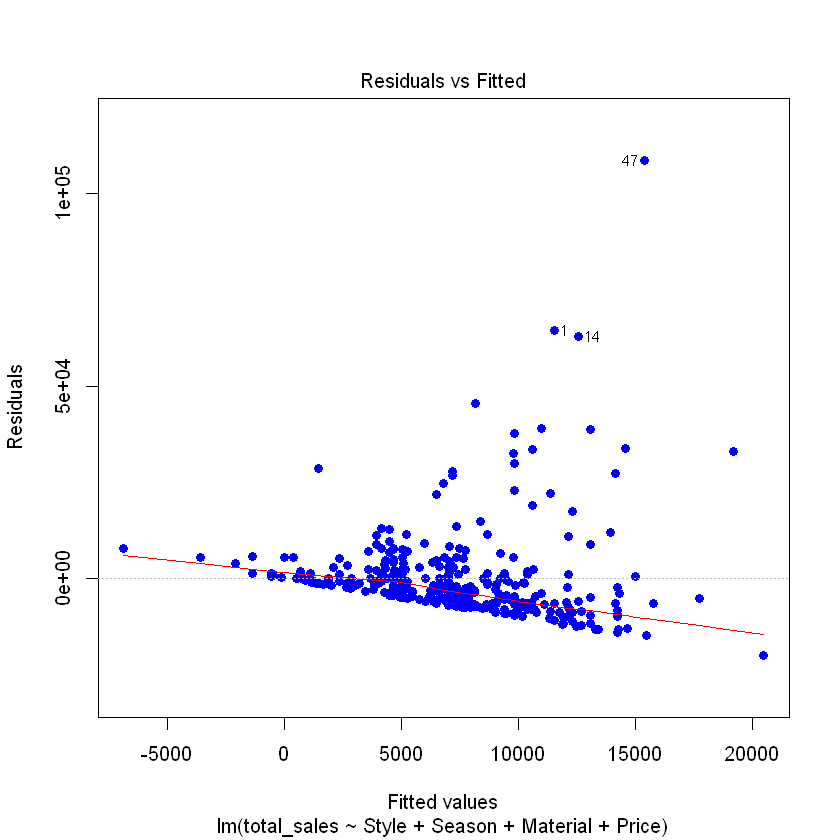

Warning message:
"not plotting observations with leverage one:
  8, 68, 153, 162, 202, 257, 271"

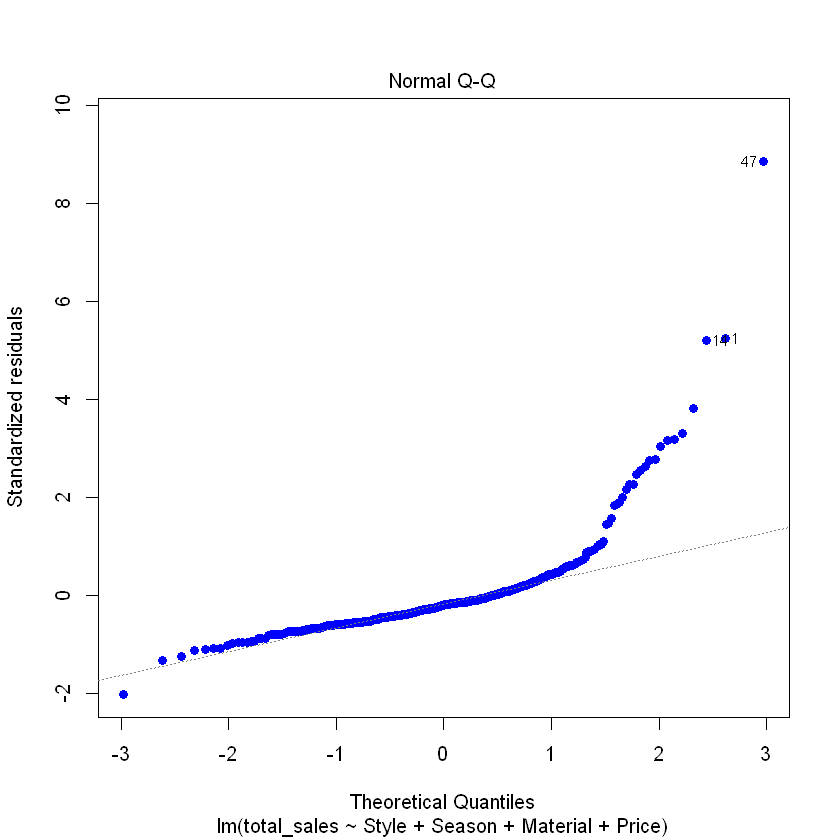

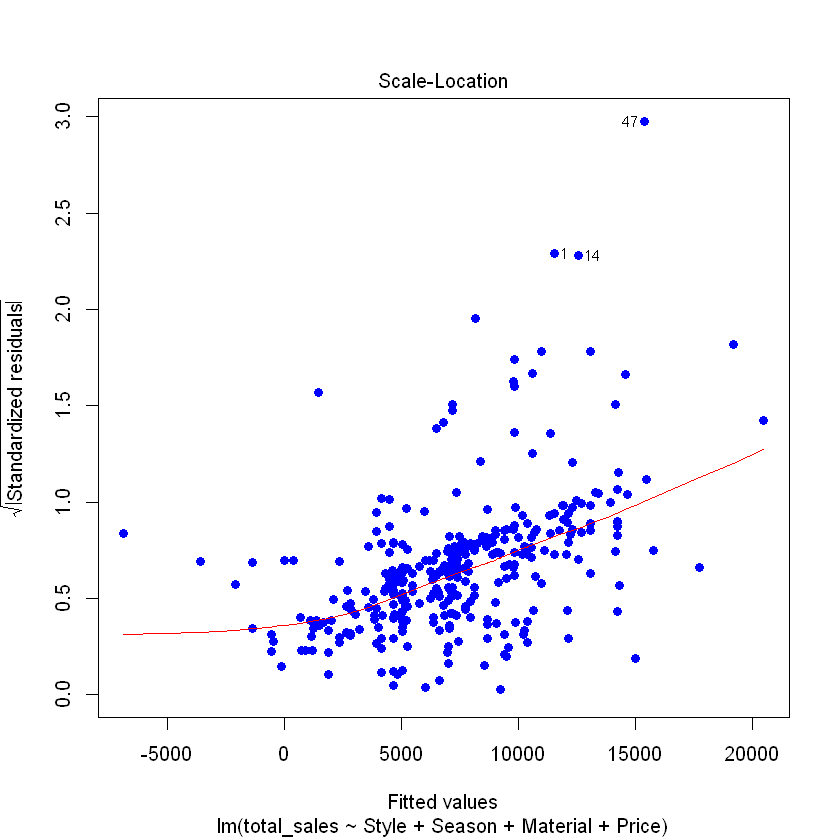

Warning message in abline(regressor_Sales):
"only using the first two of 38 regression coefficients"

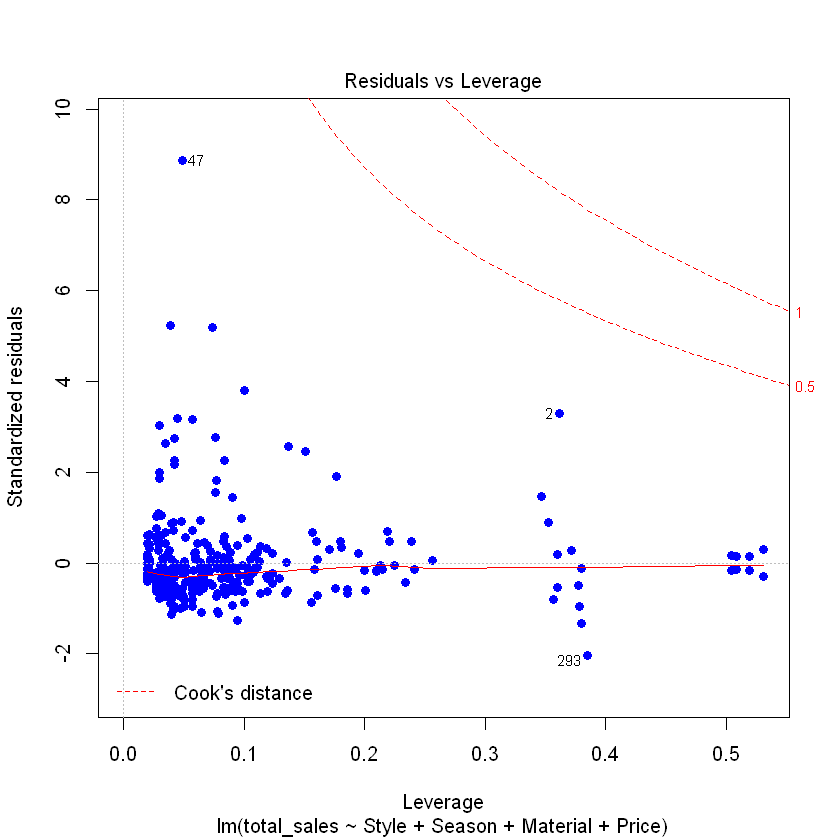

In [18]:
# regression (total sales and (Style+Season+Material+Price))
regressor_Sales = lm(formula = total_sales ~ Style+Season+Material+Price, data = train) # build model
summary(regressor_Sales) # print model summary
plot(regressor_Sales, pch = 16, col = "blue") # Plot the results
abline(regressor_Sales) # Add regression line

#### Regression (total sales and Rating)


Call:
lm(formula = total_sales ~ Rating, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9076  -6020  -2686    812 114971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2742.8     1305.0   2.102   0.0363 *  
Rating        1282.6      323.7   3.962 9.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12210 on 348 degrees of freedom
Multiple R-squared:  0.04316,	Adjusted R-squared:  0.04041 
F-statistic:  15.7 on 1 and 348 DF,  p-value: 9.022e-05


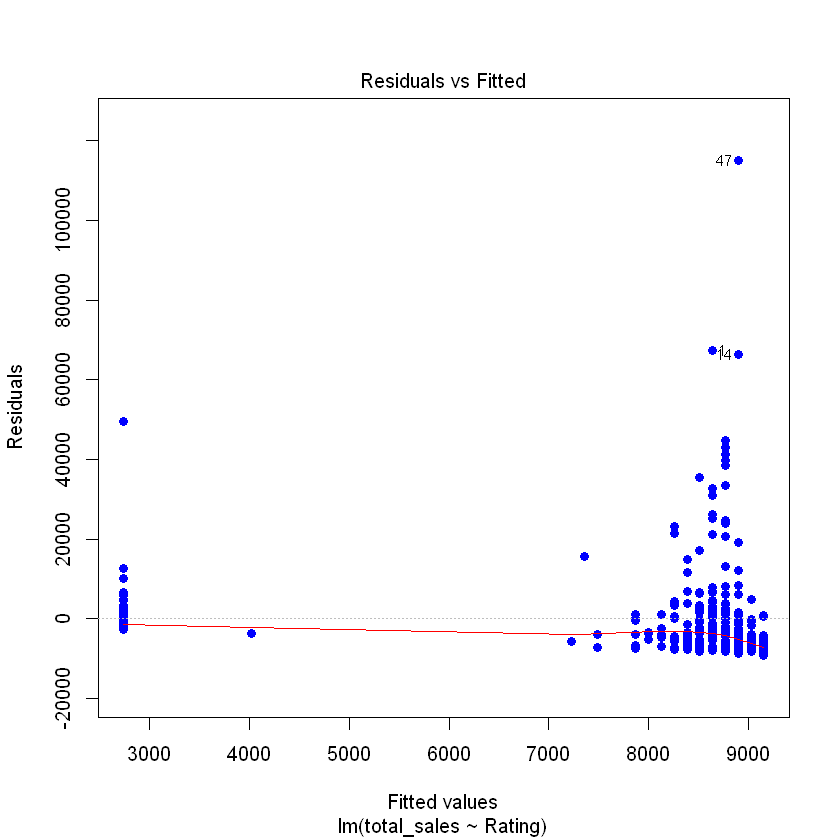

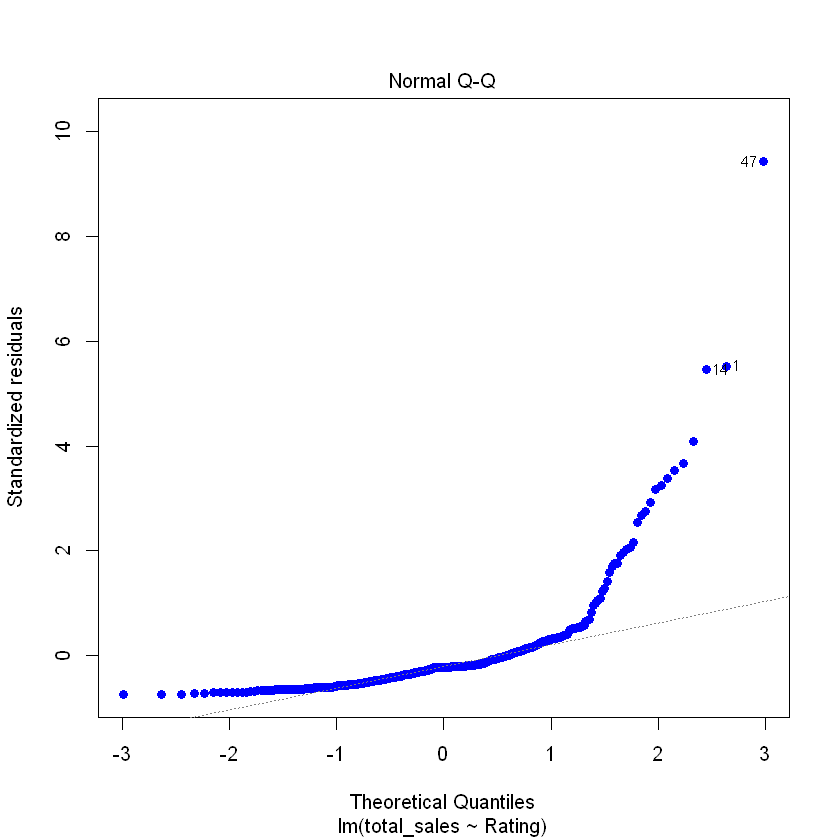

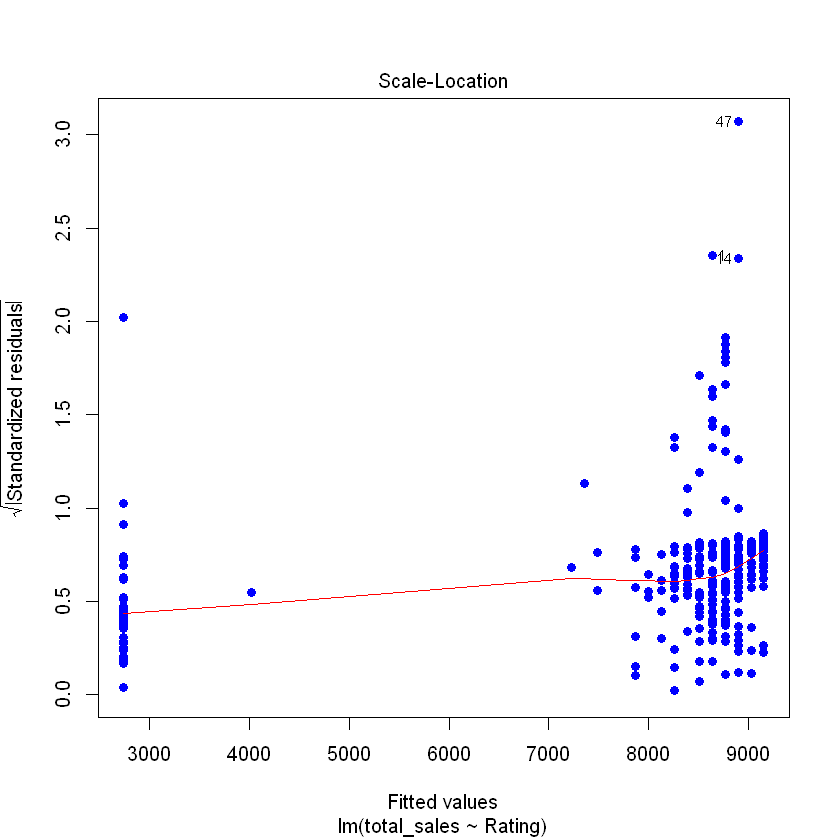

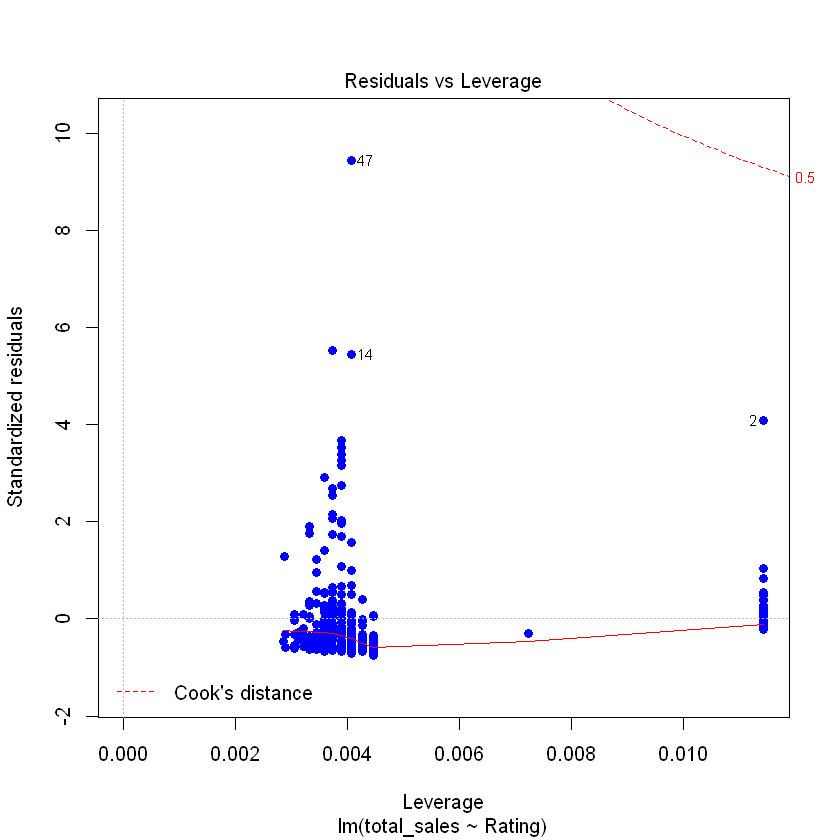

In [19]:
# regression (total sales and Rating)
regressor_Rating = lm(formula = total_sales ~ Rating, data = train) # build model
summary(regressor_Rating) # print model summary
plot(regressor_Rating, pch = 16, col = "blue") # Plot the results
abline(regressor_Rating) # Add regression line

In [20]:
# evaluation
original = test$total_sales
pred = predict(regressor_Rating,test)
predicted = pred
d = original-predicted

mse = mean((d)^2) # MSE
mae = mean(abs(d)) # MAE
rmse = sqrt(mse) # RMSE
R2 = 1-(sum((d)^2)/sum((original-mean(original))^2)) # R^2

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 7784.569 
 MSE: 274959077 
 RMSE: 16581.89 
 R-squared: 0.04042806

# Thank you 